<a href="https://colab.research.google.com/github/seunghee0518/R_File/blob/main/R_%EB%8B%A4%EB%B3%80%EB%9F%89%EB%B6%84%EC%84%9D_6%EC%9E%A5_%EC%A0%95%EC%A4%80%EC%83%81%EA%B4%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 정준상관분석 예시

In [ ]:
#적성시험과 판매실적 자료
sales_url = 'https://raw.githubusercontent.com/seunghee0518/R_File/main/%EB%8B%A4%EB%B3%80%EB%9E%91%EB%B6%84%EC%84%9D/mvadata/sales.txt'
sales = read.table(sales_url, header=T)

In [ ]:
head(sales)

,ID,X1,X2,X3,X4,Y1,Y2,Y3
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,9,12,9,20,93.0,96.0,97.8
2,2,7,10,10,15,88.8,91.8,96.8
3,3,8,12,9,26,95.0,100.3,99.0
4,4,12,14,12,29,101.3,103.8,106.8
5,5,10,15,12,32,102.0,107.8,103.0
6,6,10,14,11,21,95.8,97.5,99.3


In [ ]:
summary(sales[, c(2:8)])

       X1              X2              X3              X4       
 Min.   : 1.00   Min.   : 5.00   Min.   : 5.00   Min.   : 9.00  
 1st Qu.: 8.25   1st Qu.:12.00   1st Qu.: 9.00   1st Qu.:21.50  
 Median :10.00   Median :15.00   Median :11.00   Median :31.50  
 Mean   :11.20   Mean   :14.18   Mean   :10.56   Mean   :29.76  
 3rd Qu.:14.00   3rd Qu.:17.00   3rd Qu.:12.00   3rd Qu.:37.00  
 Max.   :18.00   Max.   :20.00   Max.   :15.00   Max.   :51.00  
       Y1               Y2              Y3        
 Min.   : 81.50   Min.   : 87.3   Min.   : 94.30  
 1st Qu.: 93.55   1st Qu.: 99.5   1st Qu.: 99.08  
 Median :100.65   Median :106.2   Median :103.15  
 Mean   : 98.84   Mean   :106.6   Mean   :102.81  
 3rd Qu.:105.05   3rd Qu.:114.8   3rd Qu.:106.45  
 Max.   :110.80   Max.   :122.3   Max.   :115.30  

In [ ]:
# 각 변수별 표준편차 구하기
install.packages('psych')
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
SD(sales[, c(2:8)])

X1        X2        X3        X4        Y1        Y2        Y3 
 3.943478  3.384780  2.139617 10.537707  7.337345 10.124315  4.712218

In [ ]:
#상관계수행렬 구하기
library(ggplot2)
install.packages('GGally')
library(GGally)
install.packages('CCA')
library(CCA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘mvtnorm’, ‘locfit’, ‘ash’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘plot3D’, ‘pcaPP’, ‘hdrcde’, ‘ks’, ‘bitops’, ‘rainbow’, ‘RCurl’, ‘dotCall64’, ‘gridExtra’, ‘fds’, ‘spam’, ‘viridis’, ‘maps’, ‘fda’, ‘fields’


Loading required package: fda

Loading required package: splines

Loading required package: Matrix

Loading required package: fds

Loading required package: rainbow

Loading required package: MASS

Loading required package: pcaPP

Loading required package: RCurl


Attaching package: ‘fda’


The following object is masked from ‘package:graphics’:

    matplot


Loading required package: fields

Loading required package: spam

Loading required package: dotCall64

Loading required package: grid

Spam version 2.6-0 (2020-12-14) is loaded.
Type 'help( Spam)' or 'demo( spam)' fo

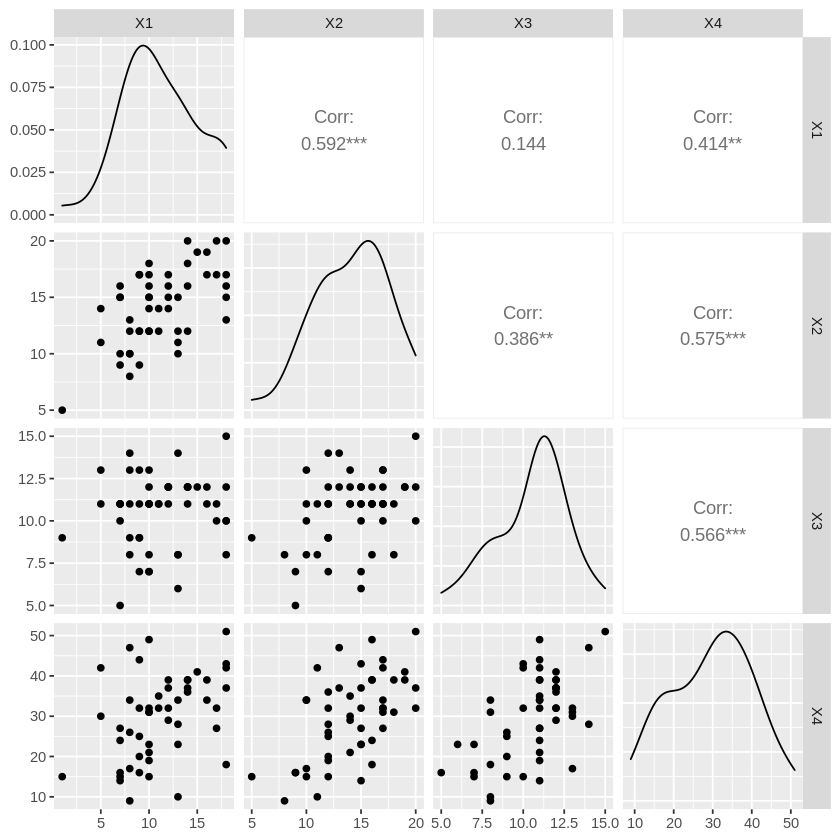

In [ ]:
exam = sales[, c(2:5)]
perform = sales[, c(6:8)]

#X1~X4로 이루어진 객체 exam의 산점도 및 상관계수
ggpairs(exam)

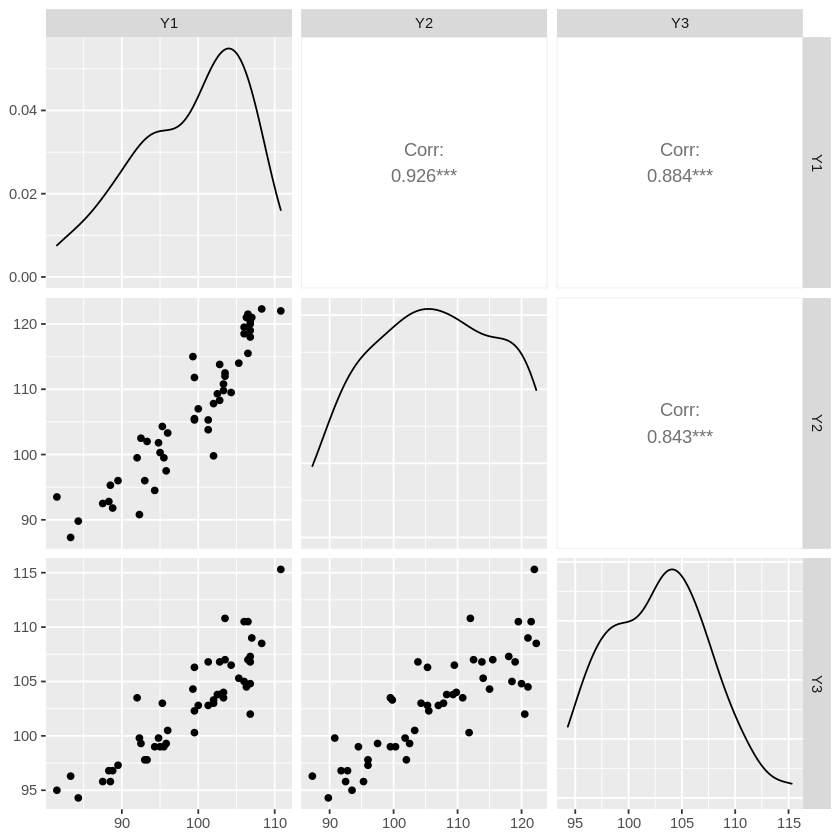

In [ ]:
#Y1~Y3으로 이루어진 객체 perform의 산점도 및 상관계수
ggpairs(perform)

In [ ]:
# 두 변수의 상관계수행렬
matcor(exam, perform)

$Xcor
          X1        X2        X3        X4
X1 1.0000000 0.5920105 0.1436729 0.4137107
X2 0.5920105 1.0000000 0.3859502 0.5745533
X3 0.1436729 0.3859502 1.0000000 0.5663721
X4 0.4137107 0.5745533 0.5663721 1.0000000

$Ycor
          Y1        Y2        Y3
Y1 1.0000000 0.9260758 0.8840023
Y2 0.9260758 1.0000000 0.8425232
Y3 0.8840023 0.8425232 1.0000000

$XYcor
          X1        X2        X3        X4        Y1        Y2        Y3
X1 1.0000000 0.5920105 0.1436729 0.4137107 0.5712660 0.5438665 0.6971657
X2 0.5920105 1.0000000 0.3859502 0.5745533 0.7080738 0.7459097 0.6374712
X3 0.1436729 0.3859502 1.0000000 0.5663721 0.6744073 0.4653880 0.6410886
X4 0.4137107 0.5745533 0.5663721 1.0000000 0.9273116 0.9442960 0.8525682
Y1 0.5712660 0.7080738 0.6744073 0.9273116 1.0000000 0.9260758 0.8840023
Y2 0.5438665 0.7459097 0.4653880 0.9442960 0.9260758 1.0000000 0.8425232
Y3 0.6971657 0.6374712 0.6410886 0.8525682 0.8840023 0.8425232 1.0000000

* $Xcor의 결과에서 X변수군과 Y변수군 사이에 전반적으로 강한 양의 상관관계가 있음을 알 수 있다.

In [ ]:
#정준상관분석 실행하기
canonical.result = cc(exam, perform)
names(canonical.result) # 결과를 저장하는 변수 객체

[1] "cor"    "names"  "xcoef"  "ycoef"  "scores"

In [ ]:
#두 변수군의 정준상관계수 : 가능한 정준상관계수 쌍은 두 변수군중 작은 값이므로 3개
canonical.result$cor

[1] 0.9941528 0.8736326 0.3818977

* 제1정준상관계수 : 0.994
* 즉, 두 변수집단 사이에는 매우 높은 상관관계가 있다.
* 제2정준상관계수 : 0.874
* 유의미한 의미를 가진다

In [ ]:
canonical.result$names

$Xnames
[1] "X1" "X2" "X3" "X4"

$Ynames
[1] "Y1" "Y2" "Y3"

$ind.names
 [1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"
[31] "31" "32" "33" "34" "35" "36" "37" "38" "39" "40" "41" "42" "43" "44" "45"
[46] "46" "47" "48" "49" "50"

In [ ]:
#독립변수 집단의 정준변수의 선형결합계수
canonical.result$xcoef

X1,-0.06761486,0.19166238,0.24939818
X2,-0.03282084,-0.20075422,-0.14457462
X3,-0.08557668,0.50133656,-0.27278359
X4,-0.06343222,-0.06799141,0.01048697


In [ ]:
#반응변수 집단의 정준변수의 선형결합계수
canonical.result$ycoef

Y1,-0.06089225,0.1767828,-0.3761327
Y2,-0.02343702,-0.2424824,0.1022237
Y3,-0.07526146,0.2370399,0.3847899


> Y변수군과 X변수군의 제1정준변수
* V1 = -0.061 Y1 - 0.023 Y2 - 0.075 Y3
* W1 = -0.068 X1 - 0.033 X2 - 0.086 X3 - 0.063 X4

> Y변수군과 X변수군의 제2정준변수
* V2 = 0.177 Y1 - 0.242 Y2 + 0.237 Y3
* W1 = 0.192 X1 - 0.201 X2 + 0.501 X3 - 0.068 X4

In [ ]:
#독립변수 집단의 정준상관점수
head(canonical.result$scores$xscores, 5)

0.9729002,-0.1025019,0.08968621
1.4053560,0.7569754,-0.44517936
0.6599217,-0.7021127,-0.09679012
-0.1232061,0.9630638,-0.17523649
-0.2110938,0.1750106,-0.78714654


In [ ]:
#반응변수 집단의 정준상관점수
head(canonical.result$scores$yscores, 5)

0.9813751,0.35637308,-0.8185078
1.4108195,0.39527125,-0.0528803
0.6684977,-0.04828754,-0.6694632
-0.3841925,2.06566748,0.3200455
-0.2345716,0.31873419,-0.9965541


* 정준상관점수 Vn, Wn에 각 케이스 값 대입
* 원데이터에서 X변수들과 Y변수들의 각각의 평균을 뺀 값으로 계산하면 됨

> 첫번째 케이스의 V1, W1
* V1 = -0.061(Y1-평균Y1) - 0.023(Y2-평균Y2) - 0.075(Y3 - 평균Y3) = 0.98
* W1 = -0.068(X1-평균X1) - 0.033(X2-평균X2) - 0.086(X3 - 평균X3) - 0.063(X4 - 평균X4) = 0.97
* 제1정준상관계수값 0.994 -> 제1정준변수인V1, W1의 상관계수가 됨

In [ ]:
#정준변수부하 결과 : 정준변수에 대한 각 변수의 기여도를 알고자 할 때 이용됨
#정준변수와 각 변수들의 상관계수값을 나타냄
canonical.result$scores$corr.X.xscores

X1,-0.6352483,0.2112406,0.65565759
X2,-0.7236603,-0.2297134,-0.06888076
X3,-0.6428658,0.5132111,-0.56862746
X4,-0.9462723,-0.1866690,-0.09433235


* $corr.X.xscores : X변수와 X정준변수와의 부하값, X4에 경우 -0.946이며, 다른 변수들에 비해 기여도가 크다는 것을 알 수 있음

In [ ]:
canonical.result$scores$corr.Y.xscores

Y1,-0.9743097,0.009650714,-0.075803677
Y2,-0.9442884,-0.273145316,0.002605397
Y3,-0.9439746,0.170594666,0.093754591


* $corr.Y.xscores : Y변수와 X정준변수와의 부하값, Y변수와 제1X정준변수와의 값이 모두 크다는 것을 알 수 있음

In [ ]:
canonical.result$scores$corr.X.yscores

X1,-0.6315339,0.1845467,0.25039414
X2,-0.7194289,-0.2006851,-0.02630541
X3,-0.6391068,0.4483580,-0.21715753
X4,-0.9407393,-0.1630801,-0.03602531


* $corr.X.yscores : X변수와 Y정준변수와의 부하값, X4변수가 제1Y정준변수와의 값이 다른 변수들에 비해 크다는 것을 알 수 있음

In [ ]:
canonical.result$scores$corr.Y.yscores

Y1,-0.9800402,0.01104665,-0.198492088
Y2,-0.9498424,-0.31265469,0.006822237
Y3,-0.9495266,0.19527050,0.245496595


* $corr.Y.yscores : Y변수와 Y정준변수와의 부하값, 제1Y정준변수의 경우, Y변수 모두 값이 커서 관련이 높다는 것을 알 수 있다.

In [ ]:
#정준변수 산점도 그리기
#제1정준변수들의 상관계수값을 구하고, 산점도 그리기
w1 = canonical.result$scores$xscores[, 1]
v1 = canonical.result$scores$yscores[, 1]
cor(w1, v1)

[1] 0.9941528

* 제1정준상관계수는 0.994임

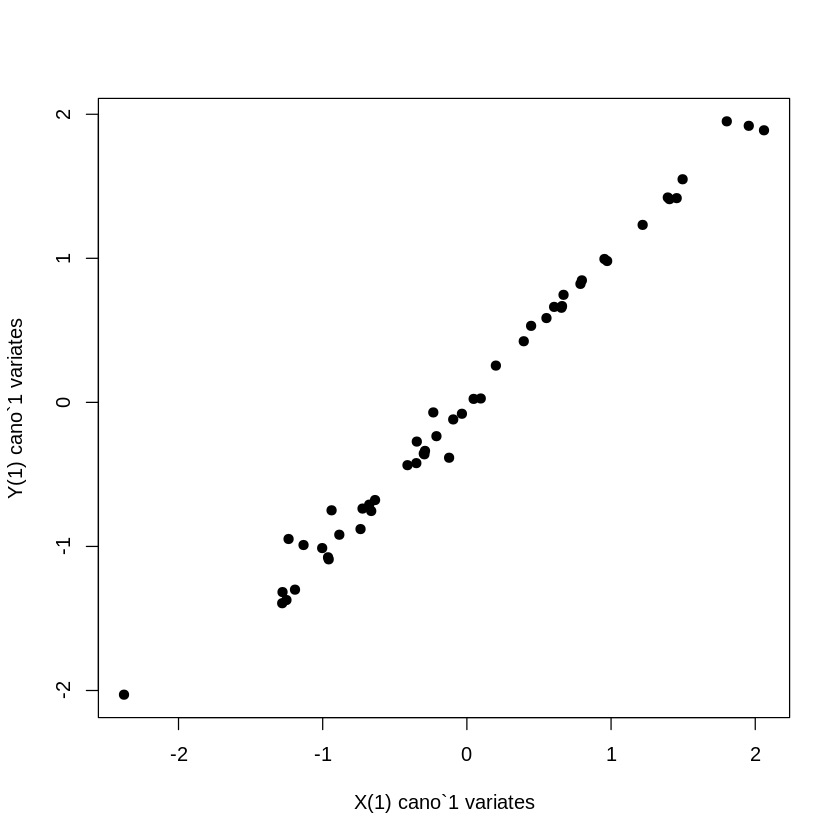

In [ ]:
plot(w1, v1, xlab = 'X(1) cano`1 variates', ylab = 'Y(1) cano`1 variates', pch = 19)